1) Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

2) Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

3) Разделите данные на выборку для обучения и тестирования

4) Постройте модель LDA

5) Визуализируйте предсказания для тестовой выборки и центры классов

6) Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

7) Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [121]:
# 1)Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [122]:
iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [123]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [124]:
# 2) Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

iris.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)
iris['variety'] = load_iris().target
iris

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [125]:
# 3) Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
iris_train, iris_test = train_test_split(iris, test_size=0.2)

In [126]:
iris_train # Данные для обучения

,sepal length (cm),sepal width (cm),variety
24,4.8,3.4,0
100,6.3,3.3,2
4,5.0,3.6,0
23,5.1,3.3,0
50,7.0,3.2,1
...,...,...,...
134,6.1,2.6,2
16,5.4,3.9,0
143,6.8,3.2,2
47,4.6,3.2,0


In [127]:
iris_test #Данные для тестирования

,sepal length (cm),sepal width (cm),variety
108,6.7,2.5,2
109,7.2,3.6,2
83,6.0,2.7,1
64,5.6,2.9,1
147,6.5,3.0,2
53,5.5,2.3,1
115,6.4,3.2,2
104,6.5,3.0,2
6,4.6,3.4,0
98,5.1,2.5,1


In [128]:
# 4) Постройте модель LDA

In [129]:
y_train, y_test = iris_train['variety'], iris_test['variety']
del iris_train['variety']
del iris_test['variety']

In [130]:
lda = LinearDiscriminantAnalysis()
lda.fit(iris_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [131]:
result = pd.DataFrame([y_test.values, lda.predict(iris_test)]).T
result

,0,1
0,2,2
1,2,2
2,1,1
3,1,1
4,2,2
5,1,1
6,2,2
7,2,2
8,0,0
9,1,1


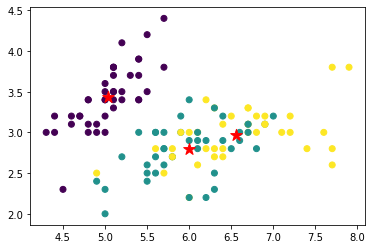

In [132]:
# 5) Визуализируйте предсказания для тестовой выборки и центры классов
plt.scatter(iris_train['sepal length (cm)'], iris_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

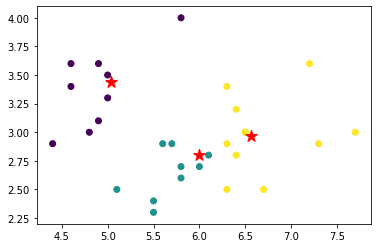

In [133]:
plt.scatter(iris_test['sepal length (cm)'], iris_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [134]:
# 6) Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
iris = iris[['sepal length (cm)','sepal width (cm)']]
iris.columns = ['sepal_length','sepal_width']
iris.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


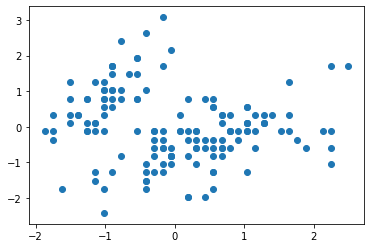

In [135]:
# 7) Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1])

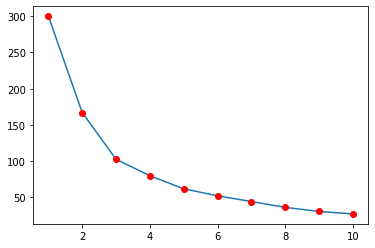

In [136]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_scaled)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
#Думаю 4 кластера

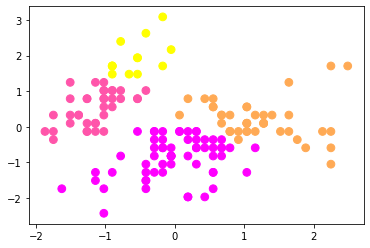

In [141]:
aglo = AgglomerativeClustering(n_clusters=4)
clusters = aglo.fit_predict(iris_scaled)
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='spring', c=clusters, s=60)